PyTorch Version: 2.8.0
Torchaudio Version: 2.8.0
Available backends: ['ffmpeg', 'soundfile']

총 4개의 오디오 파일을 찾았습니다.
파일 처리 순서:
 - 095522039.m4a
 - 095522040.m4a
 - 095522041.m4a
 - 095522042.m4a

과제 시작: 모든 파일에 대해 I/O 및 리샘플링, 시각화 수행


========================= << 처리 시작: 095522039.m4a >> =========================

--- [1/3] 원본 (Original) ---
Sample Rate: 44100 Hz


/var/folders/hy/4l8rh64x5jq6wnmxtmp4ddb00000gn/T/ipykernel_332/3122205764.py:18: UserWarning: torchaudio._backend.list_audio_backends has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be removed from the 2.9 release. 
  print(f"Available backends: {torchaudio.list_audio_backends()}")


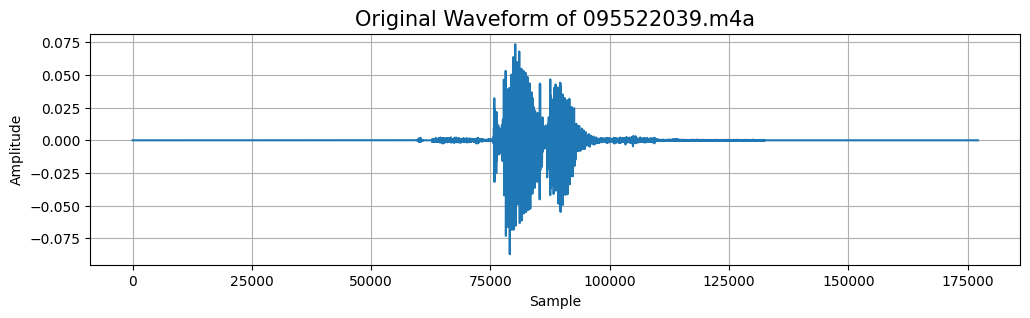

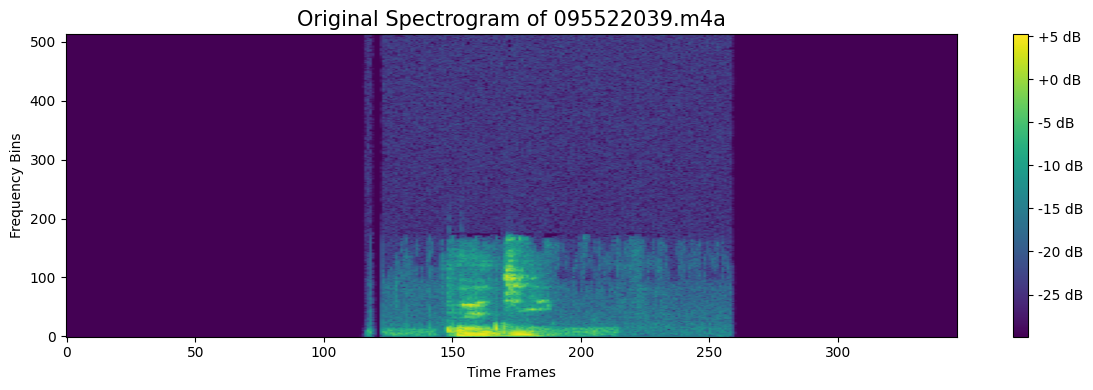

▶ 원본 오디오 재생:



--- [2/3] 다운샘플링 (Downsampled to 22050 Hz) ---


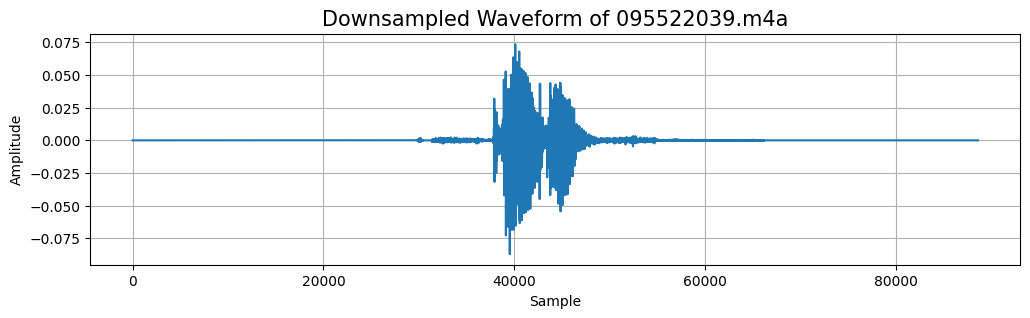

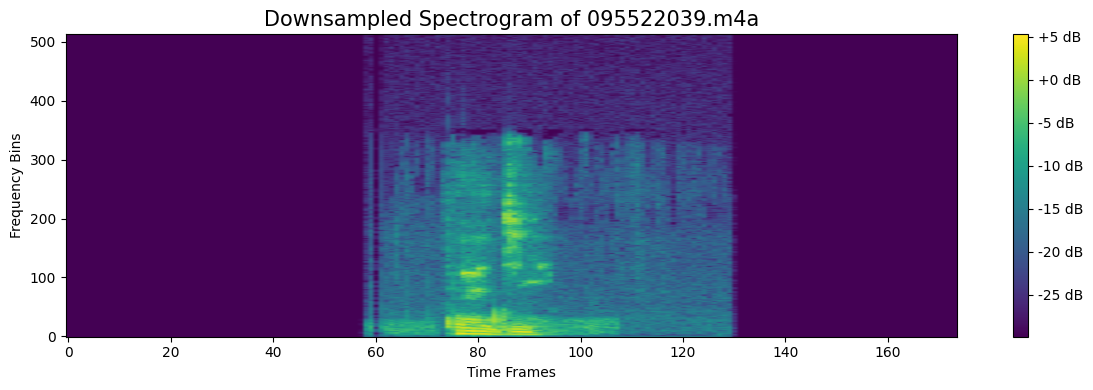

▶ 다운샘플링된 오디오 재생:



--- [3/3] 업샘플링 (Upsampled to 44100 Hz) ---


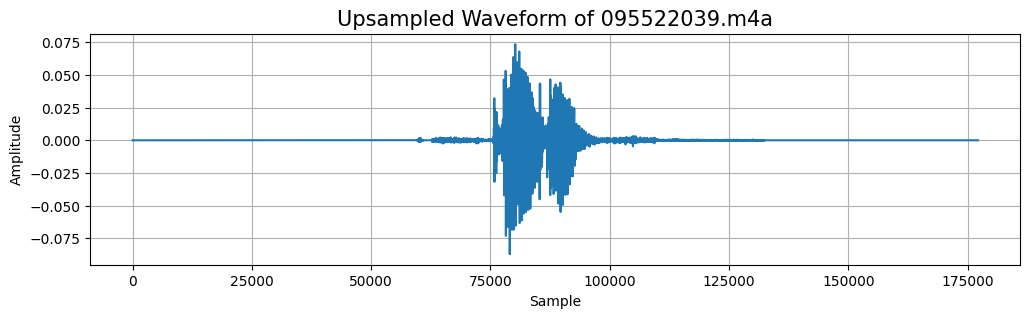

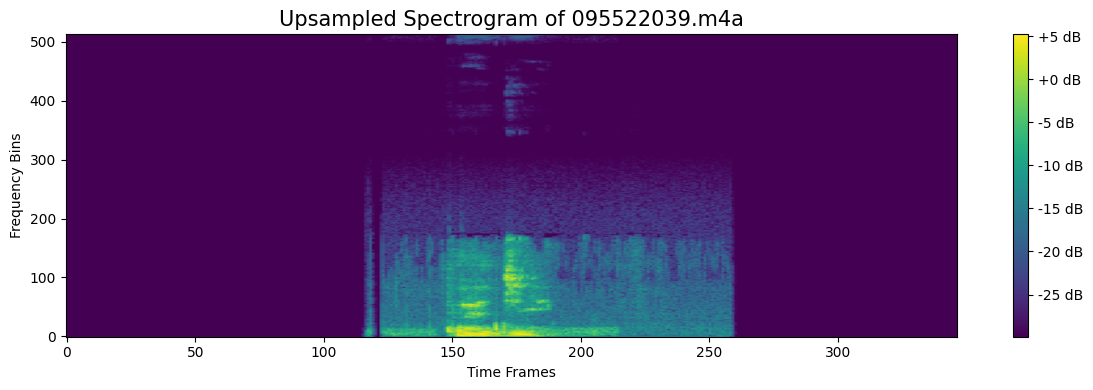

▶ 업샘플링된 오디오 재생:




========================= << 처리 시작: 095522040.m4a >> =========================

--- [1/3] 원본 (Original) ---
Sample Rate: 44100 Hz


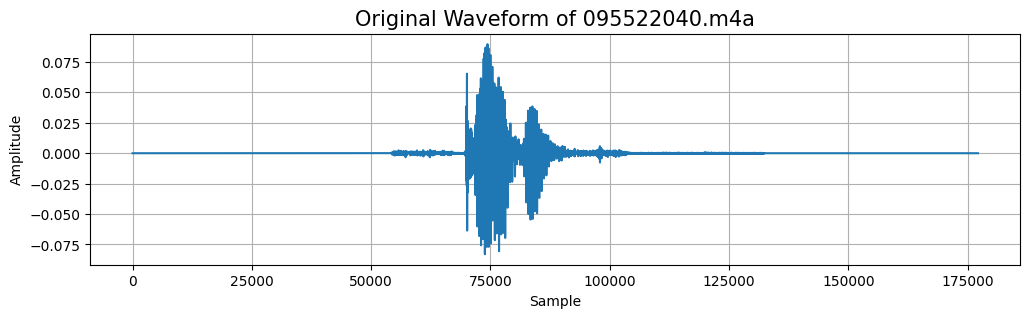

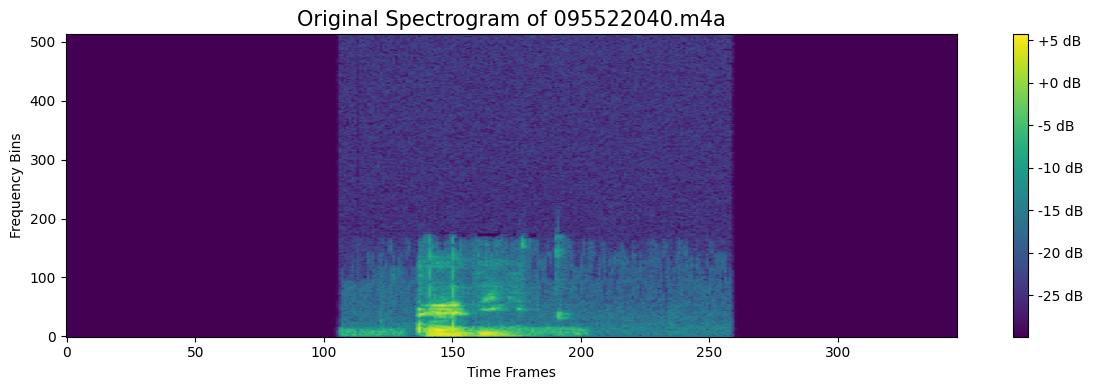

▶ 원본 오디오 재생:



--- [2/3] 다운샘플링 (Downsampled to 22050 Hz) ---


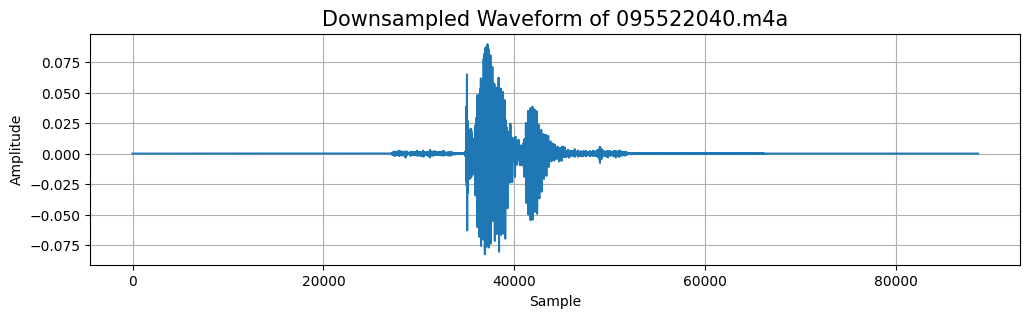

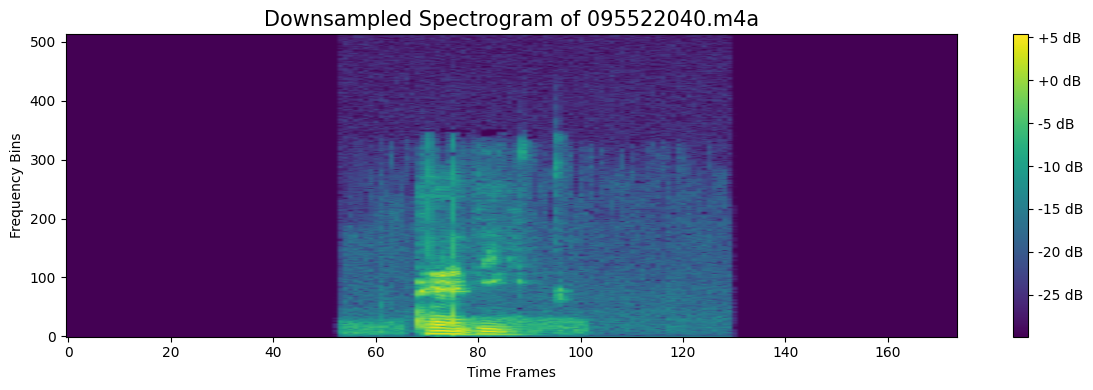

▶ 다운샘플링된 오디오 재생:



--- [3/3] 업샘플링 (Upsampled to 44100 Hz) ---


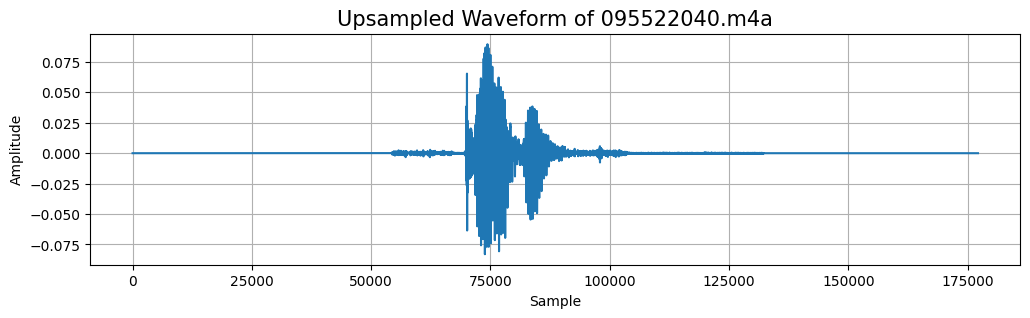

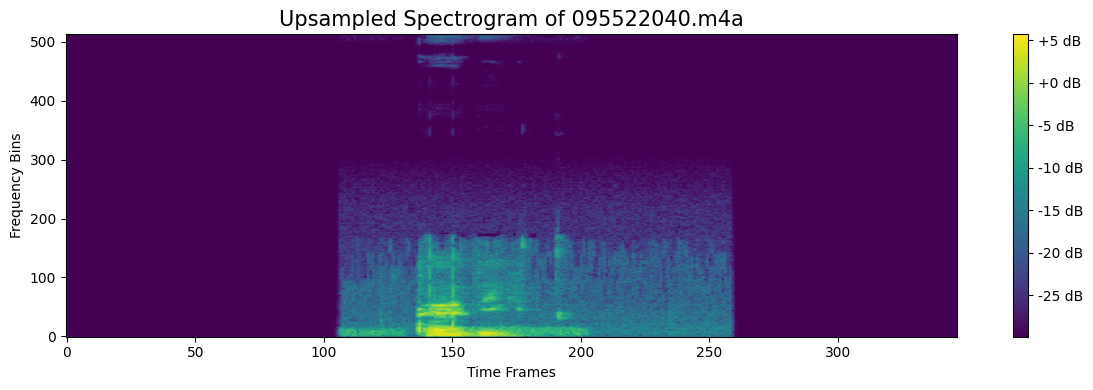

▶ 업샘플링된 오디오 재생:




========================= << 처리 시작: 095522041.m4a >> =========================

--- [1/3] 원본 (Original) ---
Sample Rate: 44100 Hz


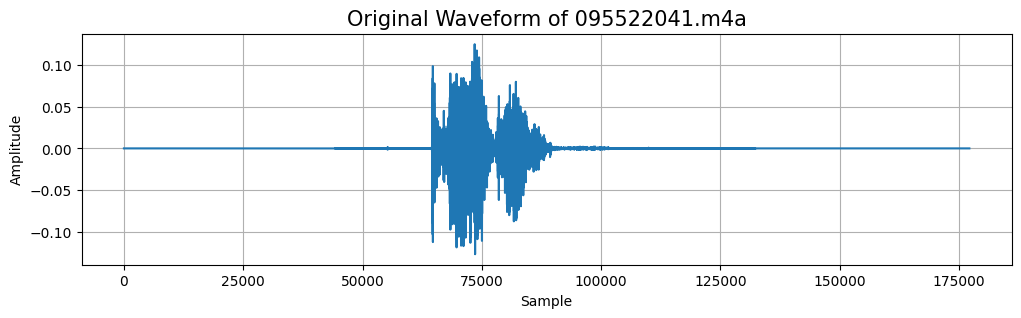

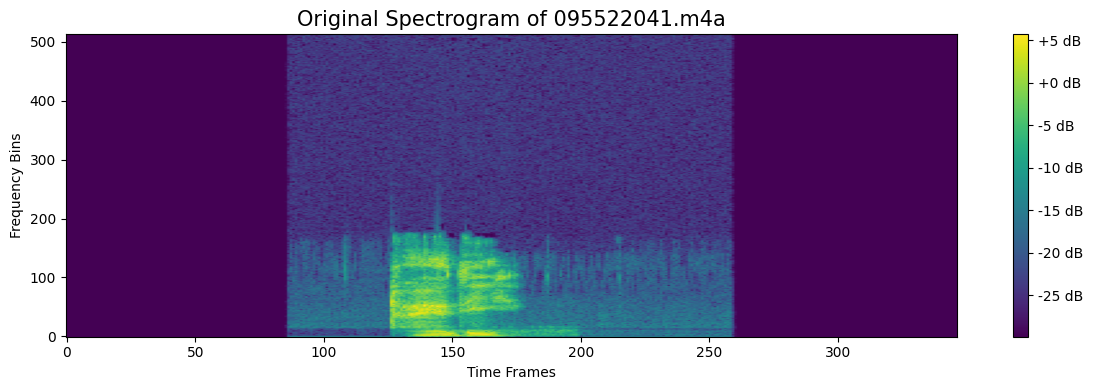

▶ 원본 오디오 재생:



--- [2/3] 다운샘플링 (Downsampled to 22050 Hz) ---


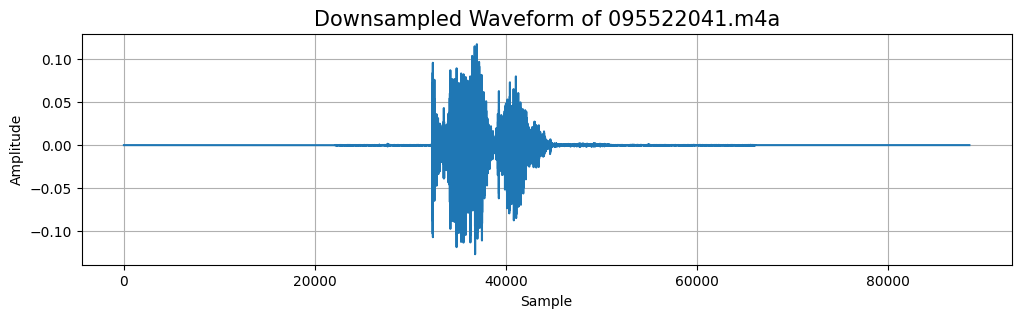

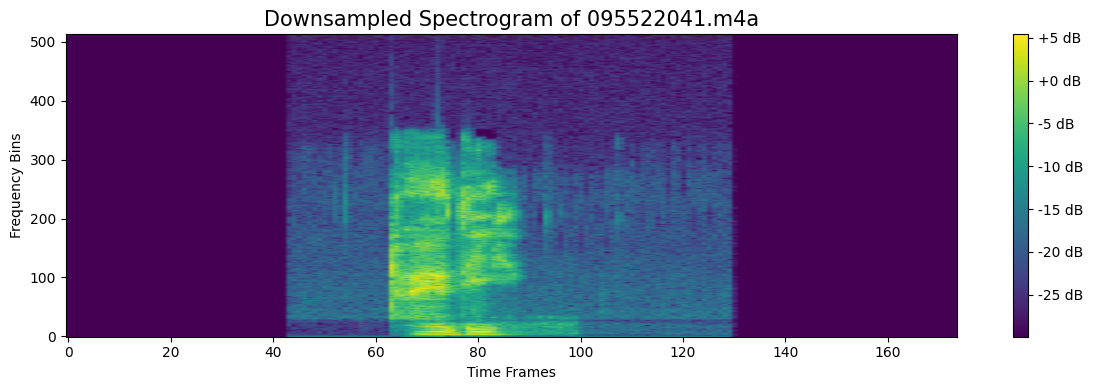

▶ 다운샘플링된 오디오 재생:



--- [3/3] 업샘플링 (Upsampled to 44100 Hz) ---


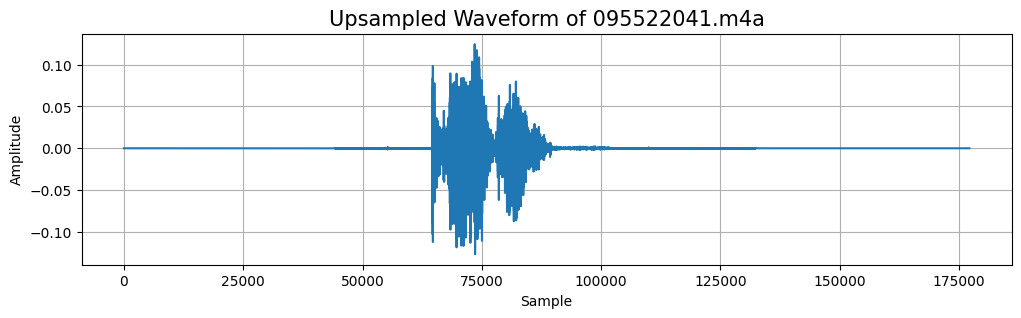

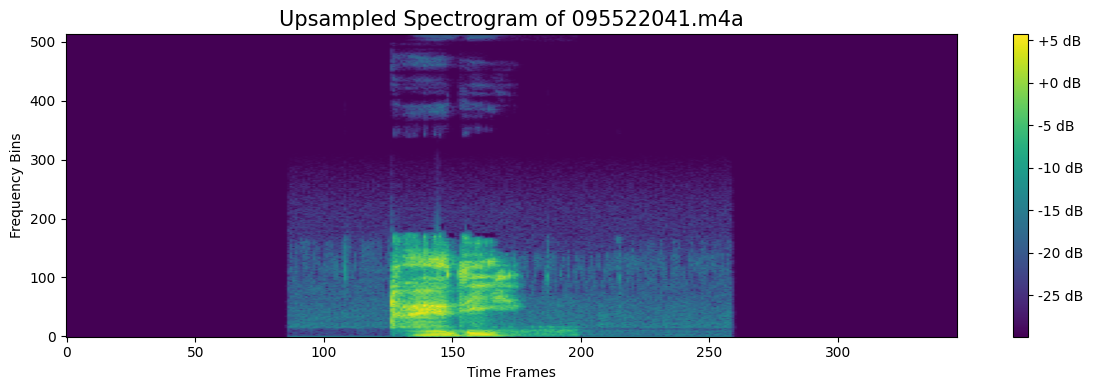

▶ 업샘플링된 오디오 재생:




========================= << 처리 시작: 095522042.m4a >> =========================

--- [1/3] 원본 (Original) ---
Sample Rate: 44100 Hz


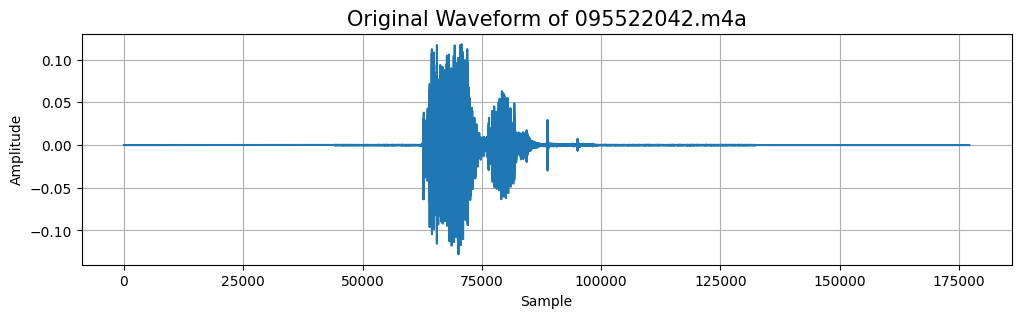

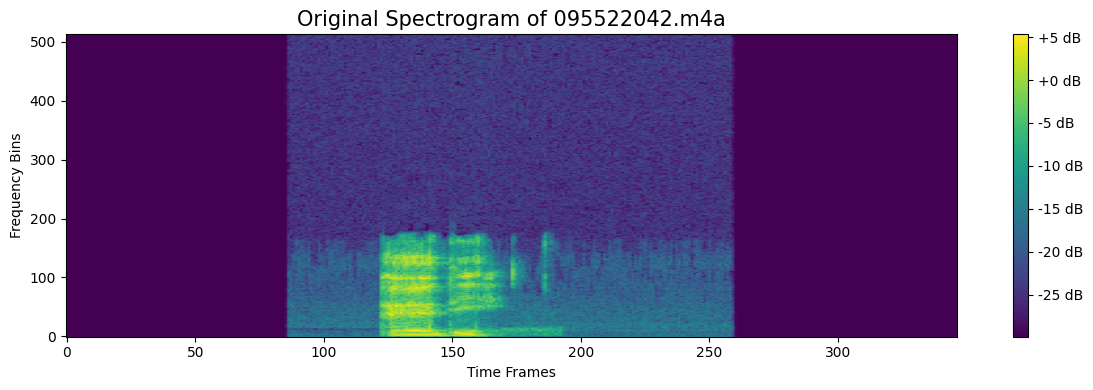

▶ 원본 오디오 재생:



--- [2/3] 다운샘플링 (Downsampled to 22050 Hz) ---


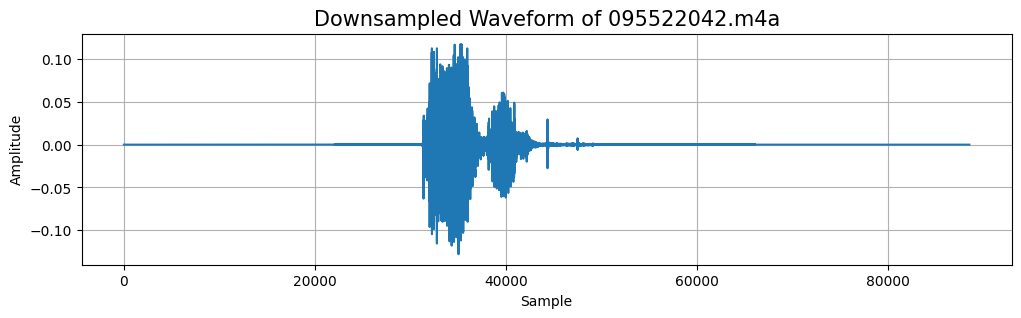

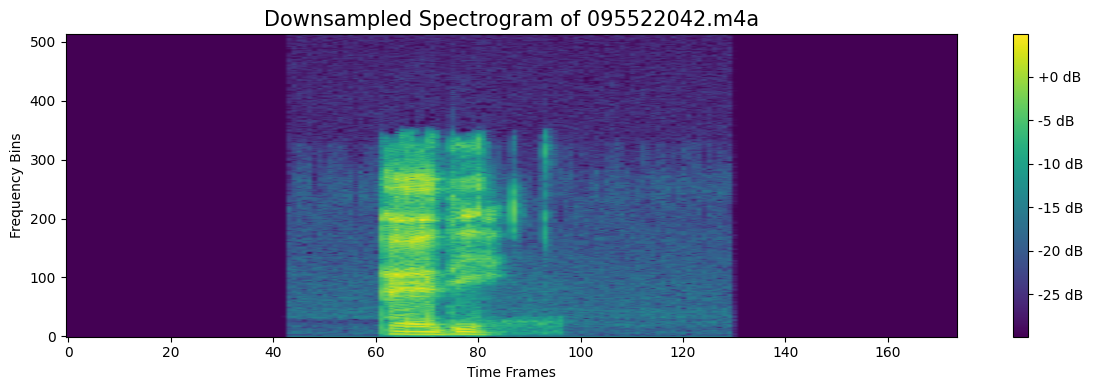

▶ 다운샘플링된 오디오 재생:



--- [3/3] 업샘플링 (Upsampled to 44100 Hz) ---


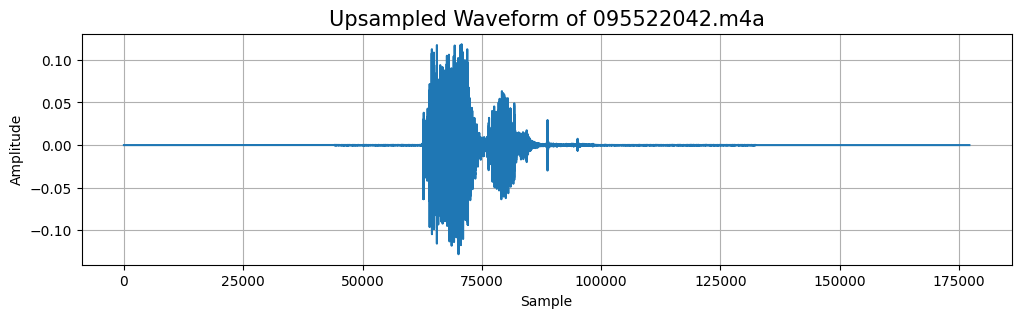

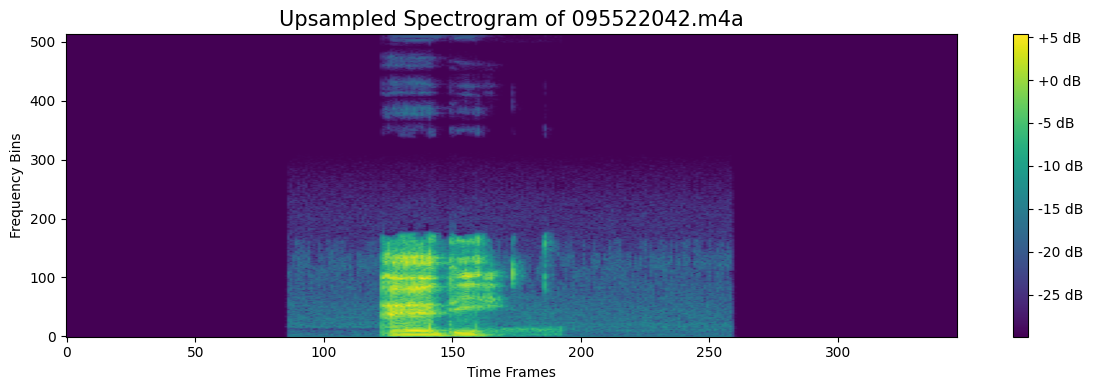

▶ 업샘플링된 오디오 재생:


In [4]:
#################################################################
# 단계 0: 환경 설정 및 데이터 경로 확인
#################################################################

# --- 1. 필요한 라이브러리 모두 불러오기 ---
import torch
import torchaudio
import torchaudio.transforms as T
import torchaudio.functional as F

import os
import glob
import matplotlib.pyplot as plt
from IPython.display import Audio, display

print(f"PyTorch Version: {torch.__version__}")
print(f"Torchaudio Version: {torchaudio.__version__}")
print(f"Available backends: {torchaudio.list_audio_backends()}")

# --- 2. 데이터셋 경로 설정 및 파일 리스트 가져오기 ---
DATASET_PATH = os.path.expanduser('~/Desktop/인공지능/data/audio_dataset')

# --- 3. [수정된 부분] 경로에 있는 모든 .m4a 파일 리스트를 '이름 오름차순으로 정렬하여' 가져오기 ---
audio_files = sorted(glob.glob(os.path.join(DATASET_PATH, '*.m4a')))


if not audio_files:
    print(f"\n경고: '{DATASET_PATH}' 경로에서 .m4a 파일을 찾을 수 없습니다.")
else:
    print(f"\n총 {len(audio_files)}개의 오디오 파일을 찾았습니다.")
    print("파일 처리 순서:")
    for f in audio_files:
        print(f" - {os.path.basename(f)}")


#################################################################
# 단계 1: 시각화를 위한 보조 함수 정의
#################################################################

def plot_waveform(waveform, sample_rate, title):
    """주어진 Waveform을 그리는 함수"""
    plt.figure(figsize=(12, 3))
    plt.plot(waveform.t().numpy())
    plt.title(title, fontsize=15)
    plt.xlabel("Sample")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.show()

def plot_spectrogram(waveform, sample_rate, title):
    """주어진 Waveform의 Spectrogram을 그리는 함수"""
    spectrogram_transform = T.Spectrogram(n_fft=1024)
    spec = spectrogram_transform(waveform)
    log_spec = torch.log2(spec + 1e-9)
    
    plt.figure(figsize=(12, 4))
    plt.imshow(log_spec[0].numpy(), aspect='auto', origin='lower', cmap='viridis')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title, fontsize=15)
    plt.xlabel('Time Frames')
    plt.ylabel('Frequency Bins')
    plt.tight_layout()
    plt.show()

#################################################################
# 단계 2: 모든 오디오 파일에 대해 리샘플링 및 시각화 수행
#################################################################
print("\n" + "="*70)
print("과제 시작: 모든 파일에 대해 I/O 및 리샘플링, 시각화 수행")
print("="*70)

# 찾은 모든 오디오 파일에 대해 반복 실행
for file_path in audio_files:
    try:
        filename = os.path.basename(file_path)
        print(f"\n\n{'='*25} << 처리 시작: {filename} >> {'='*25}")
        
        # --- 1. 원본 오디오 처리 ---
        original_waveform, original_sample_rate = torchaudio.load(file_path)
        print(f"\n--- [1/3] 원본 (Original) ---")
        print(f"Sample Rate: {original_sample_rate} Hz")
        plot_waveform(original_waveform, original_sample_rate, title=f"Original Waveform of {filename}")
        plot_spectrogram(original_waveform, original_sample_rate, title=f"Original Spectrogram of {filename}")
        print("▶ 원본 오디오 재생:")
        display(Audio(original_waveform.numpy(), rate=original_sample_rate))
        
        # --- 2. 다운샘플링 처리 ---
        downsample_rate = original_sample_rate // 2
        downsampler = T.Resample(orig_freq=original_sample_rate, new_freq=downsample_rate, dtype=original_waveform.dtype)
        downsampled_waveform = downsampler(original_waveform)
        
        print(f"\n--- [2/3] 다운샘플링 (Downsampled to {downsample_rate} Hz) ---")
        plot_waveform(downsampled_waveform, downsample_rate, title=f"Downsampled Waveform of {filename}")
        plot_spectrogram(downsampled_waveform, downsample_rate, title=f"Downsampled Spectrogram of {filename}")
        print("▶ 다운샘플링된 오디오 재생:")
        display(Audio(downsampled_waveform.numpy(), rate=downsample_rate))
        
        # --- 3. 업샘플링 처리 ---
        upsampler = T.Resample(orig_freq=downsample_rate, new_freq=original_sample_rate, dtype=downsampled_waveform.dtype)
        upsampled_waveform = upsampler(downsampled_waveform)
        
        print(f"\n--- [3/3] 업샘플링 (Upsampled to {original_sample_rate} Hz) ---")
        plot_waveform(upsampled_waveform, original_sample_rate, title=f"Upsampled Waveform of {filename}")
        plot_spectrogram(upsampled_waveform, original_sample_rate, title=f"Upsampled Spectrogram of {filename}")
        print("▶ 업샘플링된 오디오 재생:")
        display(Audio(upsampled_waveform.numpy(), rate=original_sample_rate))

    except Exception as e:
        print(f"파일 처리 중 오류 발생: {file_path}, 오류: {e}")